In [1]:
#Notas:  NO se si poner algo de resuotados en el training set
#Esta bien tomar parte del rolling mean del traning set??
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(33)

T = 2000
t = np.arange(T+1) # observation times

r = np.random.randn(T)
phi = -0.4
theta = 0.6
d = 0.025

y = np.zeros(T+1)
y[0] = 100
y[1] = 100

# solo estac iniciando yo que pedo porque quiere que y1 tambien sea 100

delta_y = np.zeros(T)
delta_y[0] = y[1]-y[0]

for i in range(1,T):
    delta_y[i] = phi*(delta_y[i-1]-d)+r[i]+(theta*r[i-1])+d # verifica que este bien
    y[i+1] = y[i]+delta_y[i]
    

In [3]:
# to divide 70% for training and 30% for testing
p = .7
div = int(np.round(T*p))
yTrain = y[:div+1]
yTest = y[div+1:]

print(len(yTrain))
print(len(yTest))

delta_yTrain = delta_y[:div]
delta_yTest = delta_y[div:]
print(len(delta_yTrain))
print(len(delta_yTest))

1401
600
1400
600


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


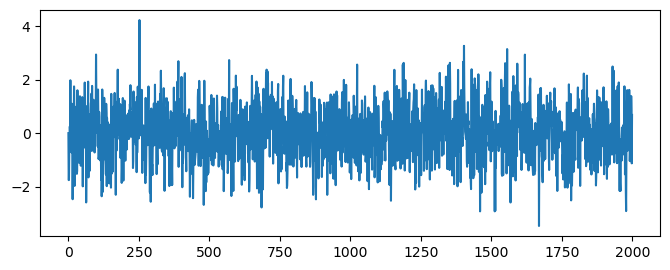

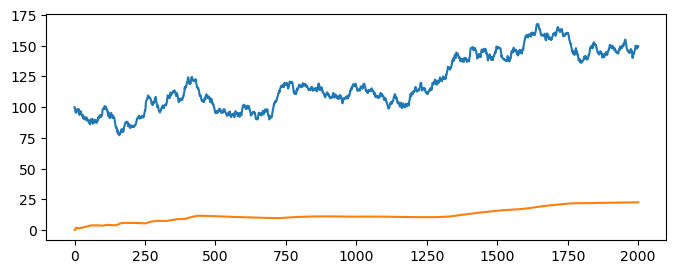

In [4]:
plot0 = plt.figure(0,figsize=(8,3), dpi=100)
plt.plot(delta_y)

std_prueba = np.zeros(len(y))
for i in range(len(y)):
    std_prueba[i] = y[:i].std()

plot1 = plt.figure(1,figsize=(8,3), dpi=100)
plt.plot(y)
plt.plot(std_prueba)
    

In [5]:
mean = yTrain.mean()
stdd = yTrain.std()
print(mean,stdd)

106.6589024727968 12.988191979893855


In [6]:
# Mean Reversion
time_window = 100

acum = [0]
acum[0] = 0

#ma = np.zeros(len(yTest))
ma = np.zeros(len(y))

w = np.zeros(len(yTest))
cash = np.zeros(len(yTest))

cash[0] = 10000

for k in range(len(y)):
    acum.append(acum[k] + y[k])
    ma[k] = y[k]
    
    if k > time_window:
        ma[k] = (acum[k] - acum[k-time_window])/(time_window)
    
for i in range(len(yTest)-1):
    #acum.append(acum[i] + yTest[i])
    #ma[i] = yTest[i]
    
    #if i > time_window:
        #ma[i] = (acum[i] - acum[i-time_window])/(time_window)
    index = i+len(yTrain)    
    if (ma[index]+stdd) > yTest[i] and (ma[index]-stdd) < yTest[i]: # you do nothing
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if (ma[index]+stdd) < yTest[i]:  
        w[i+1] = 0
        cash[i+1] = w[i]*yTest[i] + cash[i]
        
    if (ma[index]-stdd) > yTest[i] or i == 0:
        #print(i,cash[i])
        cash[i+1] = 0
        w[i+1] = cash[i]/yTest[i]  + w[i] # es el numero de acciones que tienes
        
    
ma[index+1] = yTest[len(yTest)-1]



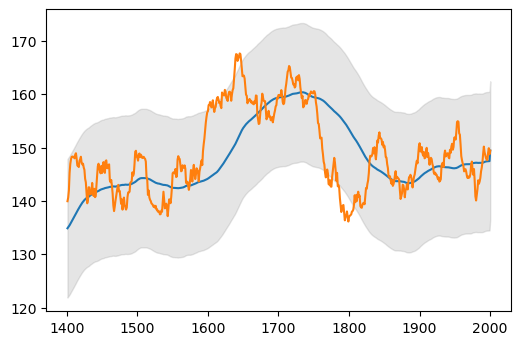

In [7]:
plot3 = plt.figure(3,figsize=(6,4), dpi=100)
plt.plot(t[1401:],ma[1401:])
plt.plot(t[1401:],yTest)
#plt.plot(t[1401:],ma[1401:]+stdd,"--")
#plt.plot(t[1401:],ma[1401:]-stdd,"--")

plt.fill_between(t[1401:], ma[1401:]-stdd, ma[1401:]+stdd,
                 facecolor="orange", # The fill color
                 color='gray',       # The outline color
                 alpha=0.2)


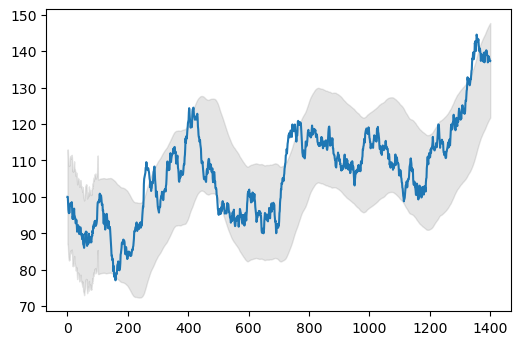

In [9]:
plot3 = plt.figure(3,figsize=(6,4), dpi=100)
plt.plot(t[:1401],yTrain)
#plt.plot(t[1401:],ma[1401:]+stdd,"--")
#plt.plot(t[1401:],ma[1401:]-stdd,"--")

plt.fill_between(t[:1401], ma[:1401]-stdd, ma[:1401]+stdd,
                 facecolor="orange", # The fill color
                 color='gray',       # The outline color
                 alpha=0.2)

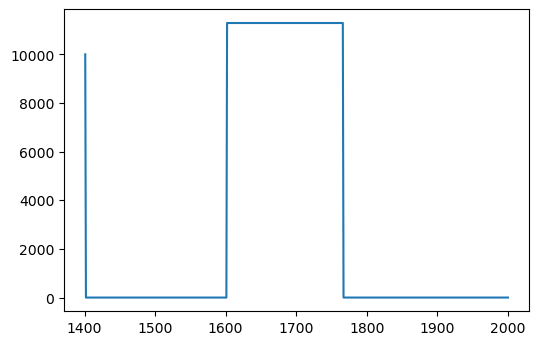

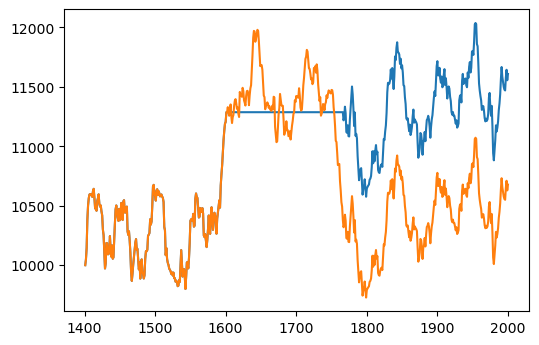

In [10]:
plot4 = plt.figure(4,figsize=(6,4), dpi=100)
plt.plot(t[1401:],cash)

strategy = [a*b for a,b in zip(w,yTest)]+ cash # No entendiste bien estoooo

plot5 = plt.figure(5,figsize=(6,4), dpi=100)
plt.plot(t[1401:], strategy)
plt.plot(t[1401:], 10000*yTest/yTest[0])

In [11]:
# modifica rolling mean a que tenga primeros valores de train

In [12]:
%precision %.2f
# What is the total return of my strategy? 
(strategy[-1]-strategy[0])/strategy[0]

0.16084343548712712

In [13]:
%precision %.2f
# What if I bought all the stocks I could on the first day and I kept them for the whole trading period?
(y[-1]-y[1400])/y[1400] # Importantiiii

0.08855228832373342

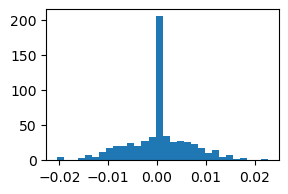

In [18]:
log_returns = np.zeros(len(yTest)-1)
for i in range(len(yTest)-1):
    a = float(strategy[i])
    b = float(strategy[i+1])
    log_returns[i] = np.log(b/a)
plot0 = plt.figure(0,figsize=(3,2), dpi=100)    
plt.hist(log_returns, bins = 30)

returns = np.zeros(len(yTest)-1)
for j in range(len(yTest)-1):
    a = float(strategy[j])
    b = float(strategy[j+1])
    returns[j] = ((b-a)/a)

In [15]:
'''cumulative_return = 100*(strategy[-1] / strategy[0]-1)
#print("Cumulative returns {:.2f}% ".format(cumulative_return))

returns2 = []
for t in range( len(strategy[1:]) ):
    returns2 = np.append(returns,(strategy[t]-strategy[t-1]/strategy[t-1]))
##calculate performance indicators


mean = returns2.mean()
std = returns2.std()

sharpe_ratio = mean/std
print(sharpe_ratio)'''

'cumulative_return = 100*(strategy[-1] / strategy[0]-1)\n#print("Cumulative returns {:.2f}% ".format(cumulative_return))\n\nreturns2 = []\nfor t in range( len(strategy[1:]) ):\n    returns2 = np.append(returns,(strategy[t]-strategy[t-1]/strategy[t-1]))\n##calculate performance indicators\n\n\nmean = returns2.mean()\nstd = returns2.std()\n\nsharpe_ratio = mean/std\nprint(sharpe_ratio)'

In [16]:
alpha = .95
#sharp = log_returns.mean()/log_returns.std()
sharp = returns.mean()/returns.std()
Var = np.quantile(log_returns,1-alpha)
es=np.mean([[v]  for v in log_returns if v < Var])
conditional_sharp = log_returns.mean()/es

print("Performance Indicators of Trend Following Trading Strategy")
print("Sharp Ratio        = ",sharp)
print("Value at Risk      = ",Var)
print("Expected Shortfall = ",es)
print("Conditional Sharp = ",conditional_sharp)

Performance Indicators of Trend Following Trading Strategy
Sharp Ratio        =  0.04201241609761813
Value at Risk      =  -0.010548801885730529
Expected Shortfall =  -0.014148778413728436
Conditional Sharp =  -0.017598201667388746
